# Задача про пьяницу ЛШ_2017. Мастерская Data Science
## Выполнил Мальцев Илья

В решении этой задачи я использую вычисленную мной закономерность увеличения шансов на падение.

Попробовав вычислить вероятности первых шести шагов на бумажке, я понял следующее.

Во-первых, шансы упасть у пьяницы абсолютно одинаковые при n и n+1 шагах, где n - четные числа, начинающиеся с 0.

Во-вторых в шансах на падение надо учитывать количество способов шагнуть назад до падения. Я понял, что в моем способе решения эту роль играют числа Каталана.

Алгоритм решения заключается в нахождени вероятности упасть на каждых двух шагах и суммировании всех полученных результатов.

In [46]:
#Имортируем все нужные нам библиотеки
import math
import pylab
from matplotlib.mlab import frange

#Вводим количество шагов
all_steps = int(input('Введите количество шагов: '))

#Пьяница может упасть только на четный шаг, поэтому за ненадобностью делаем введенное число четным
if all_steps % 2 == 1:
    all_steps -= 1

Введите количество шагов: 1000


Функция нахождения числа Каталана. Вероятность падения умножается на количество способов сделать шаг назад. В данном случае, количество способов шагнуть назад - число Каталана.

In [ ]:
def cathalan(n):
    cathalan = math.factorial(2*n)/(math.factorial(n) * math.factorial(n+1))
    
    return cathalan

Сама функция на вычисление вероятности не упасть пьянице с обрыва.

Поясню значение некоторых переменных:

step_forward, step_back - вероятности сделать шаг вперед и назад

forward_coefficient, back_coefficient - количество переменных, участвующих в вычислении вероятности падения

chance_of_fall вероятность падения при определенном шаге

summ_cof - суммарная вероятность падения

При способе нахождения вероятности, который я выбрал, если пьяница делает 0 шагов или 1 шаг, то вероятность падения равна 1.
Поэтому для вычисления правильной вероятности выжить (переменная chance_of_alive) вычитаем суммарную вероятность падения из 2.

In [48]:
def chance_of_alive(all_steps):
    
    step_forward = 1/3; step_back = 2/3
    forward_coefficient = 1; back_coefficient = 3
    chance_of_fall = 0; summ_cof = 0
    
    #Цикл для нахождения вероятности. step - номер шага
    for step in range(0, all_steps+2, 2):
        
        #С четвертого шага в формулу нахождения вероятности включается шаг назад
        if step >= 4:
            #Собсна формула на вычисление вероятности падения
            chance_of_fall = (step_forward**(step - forward_coefficient) * step_back**(step - back_coefficient)) * cathalan(step/2)
            forward_coefficient += 1
            back_coefficient += 1
        else:
            chance_of_fall = step_forward**step * cathalan(step/2)
            
        summ_cof += chance_of_fall
        
    #Вероятность не умереть (по крайней мере, от падения с утеса)
    chance_of_alive = 2 - summ_cof
    
    return chance_of_alive

print('Шансы на выживание: ', chance_of_alive(all_steps))

Шансы на выживание:  0.7500000000000016


График, показывающий, насколько велика вероятность выживания пьяницы.

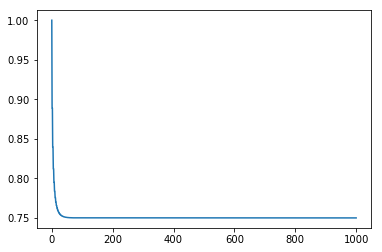

In [49]:
xlist = frange(0, all_steps, 1)
ylist = [chance_of_alive(n) for n in xlist]

pylab.plot(xlist, ylist)
pylab.show()